## Social dimensions of Eaton and Palisades fires

### 1. Metadata exploration

Variables in EJI data that could influence a community's response to a wildfire:
- Percentile rank of persons without internet 
- Percentage of age 65+


###  2. Polygon intersection

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [17]:
# Load EJI data
fp = os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb')
eji = gpd.read_file(fp)

# Load Palisades fire boundary
fp = os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp)

# Load Eaton fire boundary
fp = os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp)

In [18]:
# Check geometry type
eji.geom_type

0       MultiPolygon
1       MultiPolygon
2       MultiPolygon
3       MultiPolygon
4       MultiPolygon
            ...     
9104    MultiPolygon
9105    MultiPolygon
9106    MultiPolygon
9107    MultiPolygon
9108    MultiPolygon
Length: 9109, dtype: object

In [19]:
# Display first few rows of data
pd.set_option('display.max_columns', None)
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,Census Tract 51.27; San Joaquin County; Califo...,7580.0,1068.0,3339.0,1.5371,0.6422,1.5371,0.8546,1.8492,0.5249,70.6,0.7967,0.7967,0.7967,17.3653,0.2681,21.9,0.8673,6.4,0.6750,15.5,0.2331,23.4,0.4686,4.9,0.3598,7.8,0.3710,3.2429,0.4422,13.6,0.3482,28.7,0.8645,15.5,0.6721,6.7,0.8177,2.7025,0.9404,0.0,0.0000,0.2,0.4430,0.4430,0.2021,7.1851,0.5718,1.277,0.8778,4.104,0.9918,0.2628,0.6061,30.0,0.4976,2.9733,0.9343,64.5193,0.9859,86.8342,0.7837,100.0000,0.8446,0.000,0.0000,0.0,0.0,0.0,0.0,2.6142,0.9326,100.0000,0.5514,6.8,0.0690,8.5833,0.5168,1.1372,0.0961,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,1.000,0.8863,0,0.8863,0.8863,9.0358,0.9653,9.7,0.2505,0,4.6,0.1007,0,4.7,0.1148,0,15.9,0.3739,0,11.3,0.4116,0,0,0.0,14.2,0.6052,0.6052,0.6052,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.3182,0.9241,9,0.0,0.0,1,0.000,0.000,0,0.0408,0.0556,9,0.0,0.0,0,0.9797,0.1184,2.4746,0.3121,467.0,6.2,2800.0,36.9,1574.0,20.8,0.0,0.0,105.0,1.4,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,Census Tract 34.06; San Joaquin County; Califo...,3768.0,698.0,2198.0,2.5815,0.9857,1.7815,0.9546,3.0313,0.9703,90.9,0.9147,0.9147,0.9147,56.6348,0.9074,32.8,0.9536,11.4,0.9053,60.9,0.8374,47.8,0.9337,7.4,0.5368,13.4,0.6229,5.6971,0.9328,14.5,0.3966,32.4,0.9446,15.7,0.6828,14.3,0.9242,2.9482,0.9832,0.0,0.0000,0.3,0.5046,0.5046,0.2494,10.0646,0.9545,0.547,0.6949,3.831,0.9906,0.2316,0.5332,30.0,0.4976,2.7163,0.8823,0.0000,0.0000,4.1081,0.4003,99.9659,0.8422,0.000,0.0000,0.0,0.0,0.0,0.0,1.2425,0.5200,100.0000,0.5514,80.1,0.7802,13.5000,0.2064,1.5380,0.3928,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,0.817,0.6918,0,0.6918,0.6918,7.6134,0.8270,11.8,0.8079,1,5.5,0.1978,0,8.2,0.7153,1,20.3,0.8250,1,18.0,0.9195,1,4,0.8,15.0,0.6757,0.6757,0.6757,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.9545,0.9286,9,0.0,0.0,1,0.625,0.105,9,0.0408,0.0556,9,0.0,0.0,0,1.0892,0.1889,2.6546,0.4498,777.0,20.6,1539.0,40.8,907.0,24.1,0.0,0.0,0.0,0.0,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,

In [20]:
# Display first few rows of data
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [21]:
# Ensure the CRS match
eji = eji.to_crs(epsg = 3857)

eji.crs == palisades.crs

True

In [11]:
# Spatially join EJI data with fire perimeters on geometry column
census_within_palisades = gpd.sjoin(eji, palisades, how = 'inner', predicate = 'intersects')
census_within_eaton = gpd.sjoin(eji, eaton, how = 'inner', predicate = 'intersects')

In [12]:
# Confirm join
census_within_palisades.head()

,OBJECTID_left,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,OBJECTID_right,type,Shape__Are,Shape__Len
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,Census Tract 2627.06; Los Angeles County; Cali...,3492.0,466.0,4576.0,0.848,0.238,0.648,0.2408,1.7993,0.496,11.7,0.195,0.195,0.195,9.5074,0.0978,1.2,0.0508,3.7,0.3899,24.0,0.4047,16.5,0.2195,0.3,0.0128,0.9,0.0341,1.2096,0.058,22.6,0.7955,30.0,0.8994,7.2,0.1311,1.8,0.5723,2.3983,0.81,0.0,0.0,0.2,0.443,0.443,0.2021,4.2459,0.1178,0.729,0.7465,0.82,0.8789,0.2259,0.518,30.0,0.4976,2.641,0.8676,0.0,0.0,0.0,0.0,100.0,0.8446,0.0,0.0,0.0,0.0,0.0,0.0,0.8446,0.3699,100.0,0.5514,67.1,0.6303,14.5833,0.1225,1.3042,0.1892,0.0,0.0,100.0,0.6136,0.0,0.0,0.6136,0.2271,0.675,0.6175,0,0.6175,0.6175,6.0209,0.5302,9.1,0.1242,0,11.4,0.9251,1,5.7,0.267,0,12.8,0.087,0,8.9,0.1378,0,1,0.2,18.8,0.9236,0.9236,0.9236,0.0,0.0,7.8,0.4978,0.4978,0.4939,3.175,0.5906,9,75.4091,0.9653,9,0.0,0.0,1,4.4167,0.8605,9,0.1915,0.1237,9,0.0,0.0,0,2.5401,0.8179,3.9615,0.9513,0.0,0.0,112.0,3.2,224.0,6.4,0.0,0.0,0.0,0.0,72.0,2.1,0.0,0.0,0.0,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",0,1,Heat Perimeter,1182.082031,267.101144
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,Census Tract 2627.06; Los Angeles County; Cali...,3492.0,466.0,4576.0,0.848,0.238,0.648,0.2408,1.7993,0.496,11.7,0.195,0.195,0.195,9.5074,0.0978,1.2,0.0508,3.7,0.3899,24.0,0.4047,16.5,0.2195,0.3,0.0128,0.9,0.0341,1.2096,0.058,22.6,0.7955,30.0,0.8994,7.2,0.1311,1.8,0.5723,2.3983,0.81,0.0,0.0,0.2,0.443,0.443,0.2021,4.2459,0.1178,0.729,0.7465,0.82,0.8789,0.2259,0.518,30.0,0.4976,2.641,0.8676,0.0,0.0,0.0,0.0,100.0,0.8446,0.0,0.0,0.0,0.0,0.0,0.0,0.8446,0.3699,100.0,0.5514,67.1,0.6303,14.5833,0.1225,1.3042,0.1892,0.0,0.0,100.0,0.6136,0.0,0.0,0.6136,0.2271,0.675,0.6175,0,0.6175,0.6175,6.0209,0.5302,9.1,0.1242,0,11.4,0.9251,1,5.7,0.267,0,12.8,0.087,0,8.9,0.1378,0,1,0.2,18.8,0.9236,0.9236,0.9236,0.0,0.0,7.8,0.4978,0.4978,0.4939,3.175,0.5906,9,75.4091,0.9653,9,0.0,0.0,1,4.4167,0.8605,9,0.1915,0.1237,9,0.0,0.0,0,2.5401,0.8179,3.9615,0.9513,0.0,0.0,112.0,3.2,224.0,6.4,0.0,0.0,0.0,0.0,72.0,2.1,0.0,0.0,0.0,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.412 4033844.678, -13...",1,2,Heat Perimeter,2222.488281,185.498783
1328,6505,06,037,262706,140000US06037262706,06037

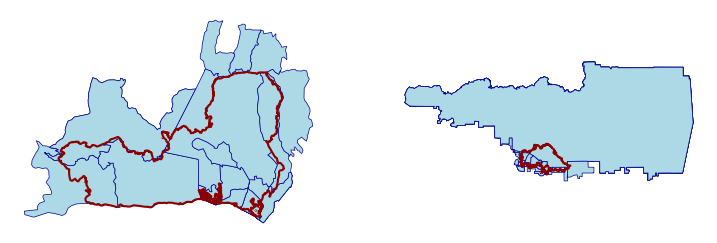

In [22]:
# Create exploratory map 
fig, ax = plt.subplots(figsize=(9,5), nrows = 1, ncols = 2)

census_within_palisades.plot(ax=ax[0], color = "lightblue", edgecolor = "darkblue", linewidth = 0.5)
palisades.boundary.plot(ax=ax[0], color = 'darkred')
census_within_eaton.plot(ax=ax[1], color = "lightblue", edgecolor = "darkblue", linewidth = 0.5)
eaton.boundary.plot(ax=ax[1], color = 'darkred')

for a in ax:
  a.axis('off')

plt.show()

### 3. Polygon clipping

Clip census tracts to palisades and eaton fire perimeter using `geopandas.clip()`

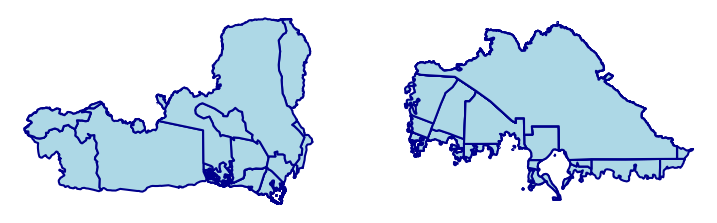

In [23]:
palisades_clipped = gpd.clip(census_within_palisades, palisades)
eaton_clipped = gpd.clip(census_within_eaton, eaton)

# Create exploratory map 
fig, ax = plt.subplots(figsize=(9,5), nrows = 1, ncols = 2)

palisades_clipped.plot(ax=ax[0], color = "lightblue", edgecolor = "darkblue", linewidth = 1.5)
eaton_clipped.plot(ax=ax[1], color = "lightblue", edgecolor = "darkblue", linewidth = 1.5)

for a in ax:
  a.axis('off')

plt.show()

### 4. Visualize fire perimeters with a basemap

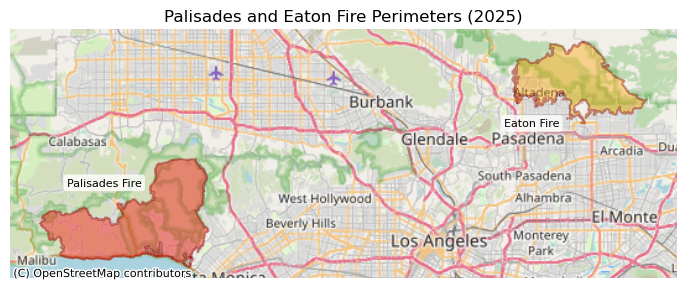

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

# Add fire perimeters and shading
palisades.plot(ax=ax, color='red', edgecolor='darkred', alpha=0.4, linewidth=1.5)
eaton.plot(ax=ax, color='orange', edgecolor='darkred', alpha=0.4, linewidth=1.5)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs = palisades.crs)

# Add fire names as text annotations
ax.text(palisades.geometry.centroid.iloc[0].x - 6000,
        palisades.geometry.centroid.iloc[0].y + 10000,
        "Palisades Fire",
        color = "black",
        fontsize = 8,
        ha = 'right',
        bbox = dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2, boxstyle= "round, pad=0.3"))

ax.text(eaton.geometry.centroid.iloc[0].x - 1000,
        eaton.geometry.centroid.iloc[0].y - 1000,
        "Eaton Fire",
        color = 'black',
        fontsize = 8,
        ha = 'right',
        bbox = dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2, boxstyle= "round, pad=0.3"))

# Add title
plt.title('Palisades and Eaton Fire Perimeters (2025)')

ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig("fire_perimeters_map.png", dpi=300, bbox_inches='tight')

### 5. Visualize EJI data

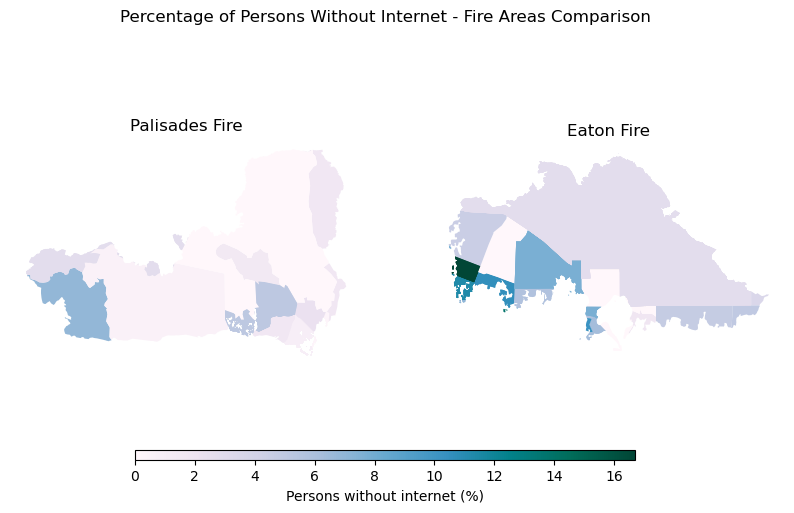

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Include our EJI variable
eji_variable = 'E_NOINT'

# Find common min/max for legend range
vmin = min(census_within_palisades[eji_variable].min(), census_within_eaton[eji_variable].min())
vmax = max(census_within_palisades[eji_variable].max(), census_within_eaton[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clipped.plot(
    column= eji_variable,
    cmap = 'PuBuGn',
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clipped.plot(
    column=eji_variable,
    cmap = 'PuBuGn',
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentage of Persons Without Internet - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(cmap= 'PuBuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Persons without internet (%)')

plt.show()